## Symbolic Regression with PDE-FIND

This notebook gives an example for a symbolic regression, whis is a promising machine learning method to gain interpretable mathematical expressions directly from data. The regression method presented here is called [PDE-FIND](https://www.science.org/doi/10.1126/sciadv.1602614), which can be used to discover the governing time-dependent partial differential equation (PDE) of an unknown system by utilizing measurements of the solution to the PDE.

Since this is a linear regression task, the problem has to be framed as follows,

$$
\textbf{u}_t = \Theta(\textbf{u}) \xi
$$

where $\Theta(\textbf{u})$ descibes the library with all possible candidate terms that describe the underlying PDE. On the other hand $\textbf{u}_t$ is the first order derivative with respect to time and has to be constructed as a column vector $\textbf{u} \in \mathbb{R}^n$. At last the ultimate goal as done in a regression task is now for a given left hand side $\textbf{u}_t$ and a feature matrix $\Theta(\textbf{u}) \in \mathbb{R}^{n \times D}$ we want to find a sparse column vector $\xi \in \mathbb{R}^n$ that describes our our corresponding PDE. The basic setup is explained in the following image.

<img src="https://media.springernature.com/lw685/springer-static/image/art%3A10.1007%2Fs10462-023-10622-0/MediaObjects/10462_2023_10622_Fig3_HTML.png" width="400">

Furthermore this task can be framed as an operator learning task, since we want the learn the operator that maps a given solution $\textbf{u}$ to the corresponding PDE $\textbf{u}_t$ describing the system's dynamics. Thus the unknown time-dependent PDE can be initially under some assumptions discussed later be defined in the form

$$
u_t = \mathcal{D}(u, u_x, u_{xx}, u_{xxx}, u_y, u_{yy}, u_{yyy}, u_{xy}, ..., x, x^2, ..., xy, x^2y, ... t),
$$

where the subscripts denote the partial derivative and we assume that the solution $\textbf{u}$ is a scalar field u(x, y, ..., t) : $\mathbb{R}^d \rightarrow \mathbb{R}^1$. From this it can be already seen that in order to get valuable results we need strong assumptions on $\Theta(\textbf{u}$ to define a proper searchspace. This is done in the following section when initializing the 3 PDE problems defined here. 

In [1]:
import os
from pde_find import Num_PDE
from utils import load_data, create_3d_plot, create_plot,  create_video

In [2]:
# Load Data from folder 'Data'
os.chdir('Data')
npz_files = [f for f in os.listdir() if f.endswith('.npz')]
npz_files = sorted(npz_files)

pdes = []
for file in npz_files:
    pdes.append(load_data(file))

pde_1 = pdes[0] # PDE Problem Nr 1
pde_2 = pdes[1] # PDE Problem Nr 2
pde_3 = pdes[2] # PDE Problem Nr 3

"""
To initialize the PDEs the following options are given
- order:        (int) defines the order of derivatives included in the search space
- combined:     (bool) defines if a combination of derivatives are allowed - u_xy*u_x
- mixed:        (bool) defines if mixed derivative terms are allowed - u_xy
- downsample:   (bool) defines if data should be downsampled in all dimensions
- alpha:        (float) defines the alpha value used for regularization in the linear
                regression. This is an important parameter since it defines the sparsity
                of our solution.
"""

# Initialization with best alpha values found through a search
pde_1 = Num_PDE(pde_1, order=3, alpha=1e-5)
pde_2 = Num_PDE(pde_2, order=3, alpha=1e-6)
pde_3 = Num_PDE(pde_3, order=2, mixed=False, downsample=True, alpha=0.0003)

## Problem Set 1 - Burger's Equation

This section describes our first Problem, which is essentially the Burger's equation. This became evident when looking at the following resulting plots. Thus, our goal is the find the following unidimensional PDE for this first problem.

$$
u_t = - uu_x + 0.1 u_{xx}
$$

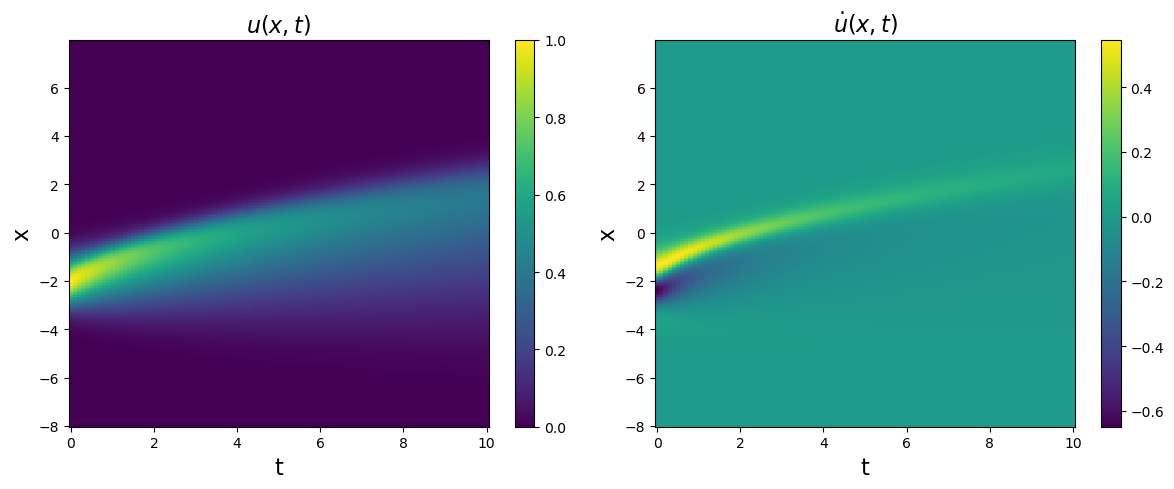

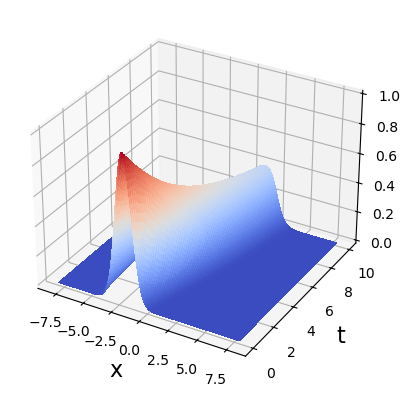

In [3]:
"""
With create_plot there is also the option to plot any derivative
A feature for all plots is to set save=True, if the images want
to be stored
"""

name = 'pde1'
create_plot(pde_1.pde, pde_1.u_t, save=False, name=name)
name = 'pde1_3D'
create_3d_plot(pde_1.pde, save=False, name=name)

In [4]:
"""
Next, we want to build the library and present what assumptions were chosen for this 
first task:
"""

Theta, library = pde_1.build_library()
print(f'The dimensions of Theta under the assumptions chosen initially are: \n{Theta.shape}\n')
pde_1.print_search_space(library) # print search space for unidimensional PDE

The dimensions of Theta under the assumptions chosen initially are: 
(25856, 13)

Defined search space under some assumption:
1:    1
2:    u
3:    u*u
4:    u*u*u
5:    u_x
6:    u_xx
7:    u_xxx
8:    u*u_x
9:    u*u*u_x
10:   u*u_xx
11:   u*u*u_xx
12:   u*u_xxx
13:   u*u*u_xxx
Elements in the search space: 13


In [5]:
"""
PDE-Find Algorithm
- features:     (bool) pre-estimation of features should be done and used for comparison
- normalize:    (bool) feature space Theta(u) and the solution vector u_t should be normalized
- find_alpha:   (bool) find the best alpha value for the lasso regression
- show_lib:     (bool) plot the library used that defines the search space
"""
print('Predicted PDE Solution:')
pde_1.pde_find_algorithm(features=True, find_alpha=True, show_lib=False)
# The best alpha value found for the first problem set is: alpha = 1e-5

print('\nExact PDE Solution:\nu_t = 0.1 * u_xx + - 1 * u*u_x')

Predicted PDE Solution:
u_t = 0.09992288053035736 * u_xx + -0.977849543094635 * u*u_x

Exact PDE Solution:
u_t = 0.1 * u_xx + - 1 * u*u_x


## Problem Set 2 - 1D Korteweg-de-Vries (KdV) equation

This section describes our second Problem, which is essentially the KdV equation. This became evident when looking at the following resulting plots. Thus, our goal is the find the following unidimensional PDE for this second problem.

$$
u_t = -6 uu_x - u_{xxx}
$$

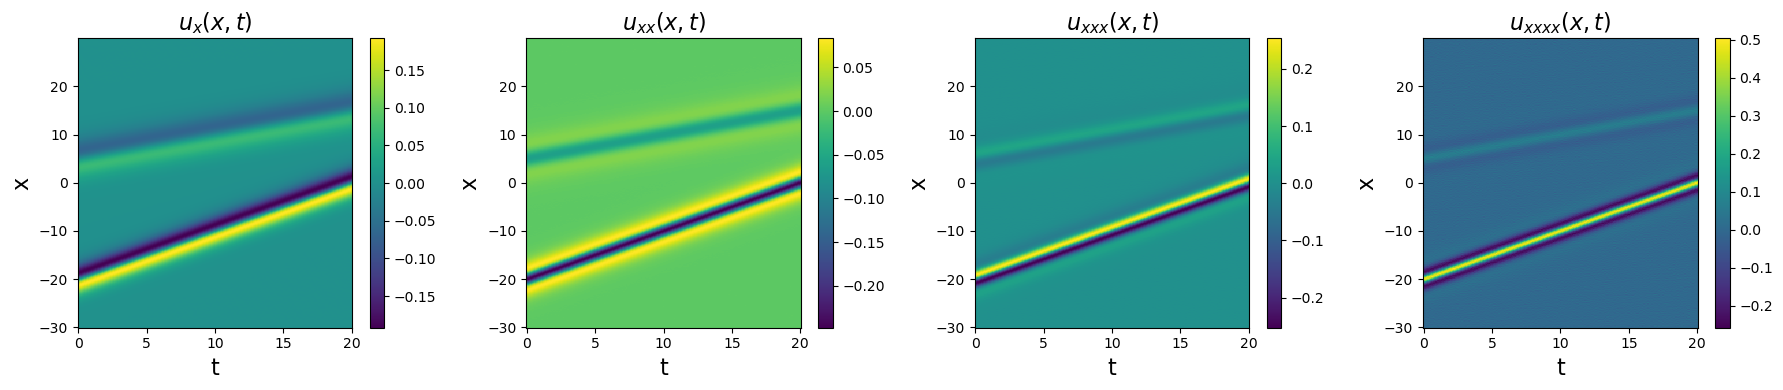

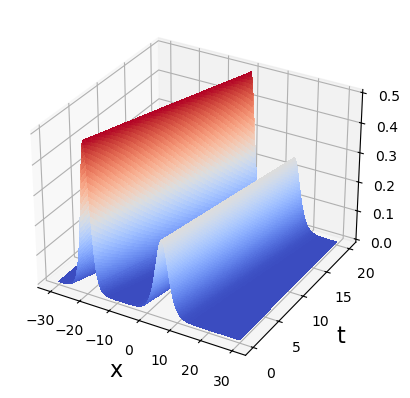

In [6]:
name = 'pde2'
create_plot(pde_2.pde, pde_2.u_x, pde_2.u_xx, pde_2.u_xxx, pde_2.u_xxxx, \
            derivative='space', save=False, name=name)

name = 'pde2_3D'
create_3d_plot(pde_2.pde, save=False, name=name)

In [7]:
Theta, library = pde_2.build_library()
print(f'The dimensions of Theta under the assumptions chosen initially are: \n{Theta.shape}\n')
pde_2.print_search_space(library) # print search space for unidimensional PDE

The dimensions of Theta under the assumptions chosen initially are: 
(102912, 13)

Defined search space under some assumption:
1:    1
2:    u
3:    u*u
4:    u*u*u
5:    u_x
6:    u_xx
7:    u_xxx
8:    u*u_x
9:    u*u*u_x
10:   u*u_xx
11:   u*u*u_xx
12:   u*u_xxx
13:   u*u*u_xxx
Elements in the search space: 13


In [8]:
"""
Note that since an alpha search is used and very low alpha values are in the search the optimizer can 
experience convergence issues. It turned out that for the problem set 2 the best alpha value is the following:
alpha = 1e-6
"""

print('Predicted PDE Solution:')
pde_2.pde_find_algorithm(features=True, find_alpha=False, show_lib=False)

print('\nExact PDE Solution:\nu_t = - 6 * u*u_x + - 1 * u_xxx')

Predicted PDE Solution:


/home/yannick/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.622e-02, tolerance: 2.382e-02
  model = cd_fast.enet_coordinate_descent(


u_t = -0.08691751956939697 * u_x + -0.9170811176300049 * u_xxx + -5.449943542480469 * u*u_x

Exact PDE Solution:
u_t = - 6 * u*u_x + - 1 * u_xxx


/home/yannick/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.622e-02, tolerance: 2.382e-02
  model = cd_fast.enet_coordinate_descent(


## Problem Set 3 - 2D Reaction-Diffusion system

This section describes our last Problem, which is essentially the 2D Reaction-Diffusion system equation. This became evident when looking at the following resulting plots. Thus, our goal is the find the following multidimensional (2D) PDE for this problem.

$$
u_t = 0.1 u_{xx} + 0.1 u_{yy} + u - uv^2 - u^3 + u^2v + v^3
$$

$$
v_t = 0.1 v_{xx} + 0.1 v_{yy} + v - u^3 - uv^2 + v -u^2v - v^3
$$

Next since it is a 3D dataset we can represent the problem for both coupled ODE solutions $\textbf{u}$ and $\textbf{v}$ in a video

![PDE_3](./Output/pde3.gif)

In [9]:
"""
To reproduce the video or store it you can uncomment the following lines of code
"""
# create_video(pde_3.pde, save=True)

'\nTo reproduce the video or store it you can uncomment the following lines of code\n'

In [10]:
"""
In the following part, I will demonstrate why it is necessary to reduce the search space for our problem
"""

third_order_mixed_searchspace = Num_PDE(pdes[2], combined=False, order=3, mixed=True, downsample=True, alpha=1e-3)
Theta, library = third_order_mixed_searchspace.build_library()
print(f'Total number of entries for a third order library with a combination of derivatives: \n{len(library)}\n')

# Even if we don't use mixed order derivatives we get a huge search space
third_order_searchspace = Num_PDE(pdes[2], combined=False, order=3, mixed=False, downsample=True, alpha=1e-3)
Theta, library = third_order_searchspace.build_library()
print(f'Total number of entries for a third order library without a combination of derivatives: \n{len(library)}\n')

"""
Thus we need to further make the assumption of initially only including second order terms and no combination
of derivatives should be allowed, since all PDEs don't contain these combinations anyway, it's a reasonable 
assumption
"""
Theta, library = pde_3.build_library()
print(f'The dimensions of Theta under the assumptions chosen initially are: \n{Theta.shape}\n')
pde_3.print_search_space(library) # print search space for unidimensional PDE

Total number of entries for a third order library with a combination of derivatives: 
118

Total number of entries for a third order library without a combination of derivatives: 
82

The dimensions of Theta under the assumptions chosen initially are: 
(495532, 34)

Defined search space under some assumption:
1:    1
2:    u
3:    u*u
4:    u_x
5:    u_xx
6:    u*u_x
7:    u*u_xx
8:    v
9:    v*v
10:   u*u*u
11:   v*v*v
12:   u*v
13:   u*u*v
14:   u*v*v
15:   v*u_x
16:   v*u_xx
17:   u_y
18:   u_yy
19:   u*u_y
20:   v*u_y
21:   u*u_yy
22:   v*u_yy
23:   v_x
24:   v_xx
25:   v_y
26:   v_yy
27:   u*v_x
28:   v*v_x
29:   u*v_xx
30:   v*v_xx
31:   u*v_y
32:   v*v_y
33:   u*v_yy
34:   v*v_yy
Elements in the search space: 34


Now we need to reframe the lefthandside $\textbf{u}_t$ instead of a 1D vector into a 2D tensor. The same is done for our quantity of interest $\xi$. Thus our problem formulation looks as follows.

<img src="https://www.researchgate.net/profile/Steven-Brunton-2/publication/281768572/figure/fig3/AS:667668935892994@1536196087377/Schematic-of-the-sparse-identification-of-nonlinear-dynamics-SINDy-algorithm.png" width="600">

In [12]:
""" 
It is possible to run the automated alpha search also for this last problem without running into 
convergence issues. But I further tried out different alpha values to optimize the results from what 
the solver gave me, even further and found that an alpha value of

    alpha = 0.0003

gave me optimal results
"""
print('Predicted PDE Solution:')
# pde_3.pde_find_algorithm(features=False, find_alpha=True, show_lib=False)
pde_3.pde_find_algorithm(features=False, find_alpha=False, show_lib=False)

print('\nExact PDE Solution:')
print('u_t = 0.1 * u_xx + 0.1 u_yy + 1 * u + - 1 * u*u*u + - 1 * v*v*v + 1 * u*u*v + 1 * v*v*v')
print('v_t = 0.1 * v_xx + 0.1 v_yy + 1 * v + - 1 * u*u*u + - 1 * u*v*v + - 1 * u*u*v + - 1 * v*v*v')

Predicted PDE Solution:
u_t = 0.19330039620399475 * u + 0.07516743987798691 * u_xx + 0.5586625337600708 * v + -0.14202561974525452 * u*u*u + 0.36801403760910034 * v*v*v + 0.3623684048652649 * u*u*v + -0.1395721733570099 * u*v*v + 0.07060273736715317 * u_yy
v_t = -0.5598199367523193 * u + 0.1919824182987213 * v + -0.3667481541633606 * u*u*u + -0.14067959785461426 * v*v*v + -0.13822880387306213 * u*u*v + -0.3610876202583313 * u*v*v + 0.07052135467529297 * v_xx + 0.07504135370254517 * v_yy

Exact PDE Solution:
u_t = 0.1 * u_xx + 0.1 u_yy + 1 * u + - 1 * u*u*u + - 1 * v*v*v + 1 * u*u*v + 1 * v*v*v
v_t = 0.1 * v_xx + 0.1 v_yy + 1 * v + - 1 * u*u*u + - 1 * u*v*v + - 1 * u*u*v + - 1 * v*v*v


In summary, same as in [PySINDy](https://github.com/dynamicslab/pysindy/blob/master/examples/10_PDEFIND_examples.ipynb) and the shown examples the regression doesn't work as perfect, but we can still gain valueable results about the potential solutions. It should be mentioned that the results highly depend on the penalty term alpha